In [ ]:
pip install pandas numpy datasets tensorflow scikit-learn fastapi uvicorn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requir

In [ ]:
!pip install datasets

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.28k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/5.14M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/151165 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/34394 [00:00<?, ? examples/s]

Epoch 1/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0341 - val_loss: 0.0050
Epoch 2/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0044 - val_loss: 0.0032
Epoch 3/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0031 - val_loss: 0.0024
Epoch 4/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 6/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0011 - val_loss: 8.7775e-04
Epoch 7/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 8.0318e-04 - val_loss: 7.9829e-04
Epoch 8/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.1276e-04 - val_loss: 6.0760e-04
Epoch 9/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.9363e-04 - val_loss: 5.7959e-04
Epoch 10/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 5.3249e-04 - val_loss: 5.2319e-04
Epoch 11/50
1821/1821 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.9116e-04 - val_lo

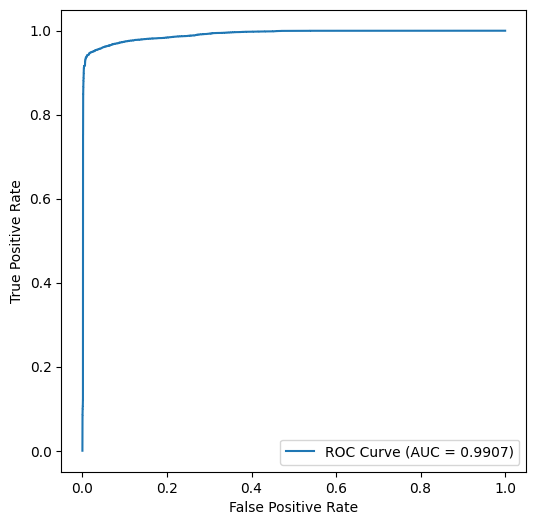

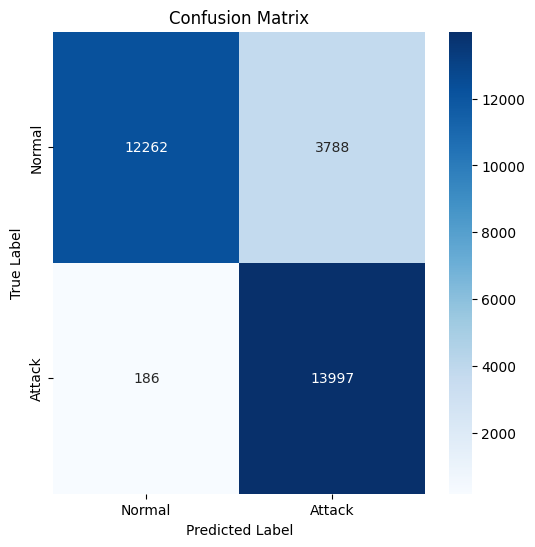

Accuracy: 0.8686
Precision: 0.7870
Recall: 0.9869
F1 Score: 0.8757
ROC AUC: 0.9907


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Layer, Attention
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import seaborn as sns

from datasets import load_dataset
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# -----------------------------
# 1️⃣ Load & Preprocess NSL-KDD Dataset
# -----------------------------

# Load dataset
ds = load_dataset("Mireu-Lab/NSL-KDD")
df = pd.DataFrame(ds["train"])

# Map 'class' to binary labels (Normal = 0, Attack = 1)
df["class"] = df["class"].apply(lambda x: 0 if x == "normal" else 1)

# One-hot encoding categorical features
categorical_features = ['protocol_type', 'service', 'flag']
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[categorical_features]).toarray()

# Convert to DataFrame and concatenate with the original
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
df = pd.concat([df.drop(columns=categorical_features), encoded_df], axis=1)

# Extract features and labels
X = df.drop(columns=['class']).values  # Features
y = df['class'].values  # Labels

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select only normal traffic for training (Self-Supervised Learning)
X_train_normal = X_train[y_train == 0]

# -----------------------------
# 2️⃣ Autoencoder with Attention Mechanism
# -----------------------------

class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, inputs):
        q, k, v = inputs, inputs, inputs  # Query, Key, Value are same (Self-Attention)
        attention_scores = tf.matmul(q, k, transpose_b=True)  # Compute attention scores
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)  # Apply softmax
        attention_output = tf.matmul(attention_scores, v)  # Multiply scores with values
        return attention_output

# Define Autoencoder Model
input_dim = X_train_normal.shape[1]

inputs = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(inputs)
encoded = Dense(32, activation='relu')(encoded)
attention_output = AttentionLayer()(encoded)  # Apply Attention Mechanism
encoded = Dense(16, activation='relu')(attention_output)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
outputs = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder
autoencoder.fit(X_train_normal, X_train_normal, epochs=50, batch_size=32, validation_split=0.1)

# -----------------------------
# 3️⃣ Compute Reconstruction Loss & Set Threshold
# -----------------------------
reconstruction = autoencoder.predict(X_train_normal)
train_loss = np.mean(np.square(X_train_normal - reconstruction), axis=1)
threshold = np.percentile(train_loss, 75)  # 95th percentile as threshold

# -----------------------------
# 4️⃣ Evaluate Model Performance
# -----------------------------
def evaluate_model(autoencoder, X_test, y_test):
    reconstructions = autoencoder.predict(X_test)
    test_loss = np.mean(np.square(X_test - reconstructions), axis=1)

    y_pred = (test_loss > threshold).astype(int)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, test_loss)
    conf_matrix = confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, test_loss)

    # Plot ROC Curve
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.4f})".format(roc_auc))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

    # Plot Confusion Matrix as Heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

# Run evaluation
evaluate_model(autoencoder, X_test, y_test)

